<a href="https://colab.research.google.com/github/tahaozdenoglu/Colab/blob/main/YZverianalizi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Geniş ve detaylı bir veri analizi yapın. Analiz için "/content/drive/MyDrive/Colab Notebooks/bahsis_veri_seti.csv" dosyasını kullanın.

## Veriyi yükleme

### Subtask:
Veri setini "/content/drive/MyDrive/Colab Notebooks/bahsis_veri_seti.csv" yolundan pandas DataFrame'e yükleyin.


**Reasoning**:
The subtask requires loading a CSV file into a pandas DataFrame. This involves importing the pandas library and using its `read_csv` function.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bahsis_veri_seti.csv')

**Reasoning**:
The previous step successfully loaded the data into a DataFrame. To verify the loading and understand the data structure, displaying the first few rows is a standard practice.



In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Veriye i̇lk bakış

### Subtask:
Veri setinin ilk birkaç satırını görüntüleyerek, sütun adlarını, veri tiplerini ve eksik değer olup olmadığını kontrol edin.


**Reasoning**:
Display the first few rows, column names, data types, and check for missing values as requested by the instructions.



In [ ]:
display(df.head())
display(df.info())
display(df.isnull().sum())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


None

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


## Keşifsel veri analizi (eda)

### Subtask:
Sayısal sütunların istatistiksel özetlerini alın (ortalama, medyan, standart sapma vb.). Kategorik sütunların dağılımlarını inceleyin (benzersiz değerler, frekanslar). Bahşiş miktarı ile diğer değişkenler arasındaki ilişkileri görselleştirin (saat, gün, kişi sayısı, toplam hesap vb.). Cinsiyet, sigara içen/içmeyen, gün ve saat gibi faktörlerin bahşiş miktarı üzerindeki etkilerini analiz edin.


**Reasoning**:
Get the descriptive statistics of numerical columns, get the value counts of categorical columns, and create visualizations to show the relationship between tip and other variables.



,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


,count
sex,
Male,157
Female,87


,count
smoker,
No,151
Yes,93


,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


,count
time,
Dinner,176
Lunch,68


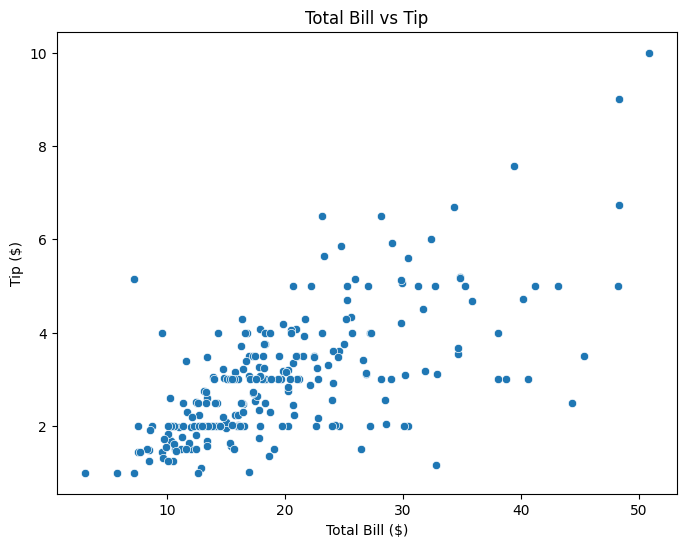

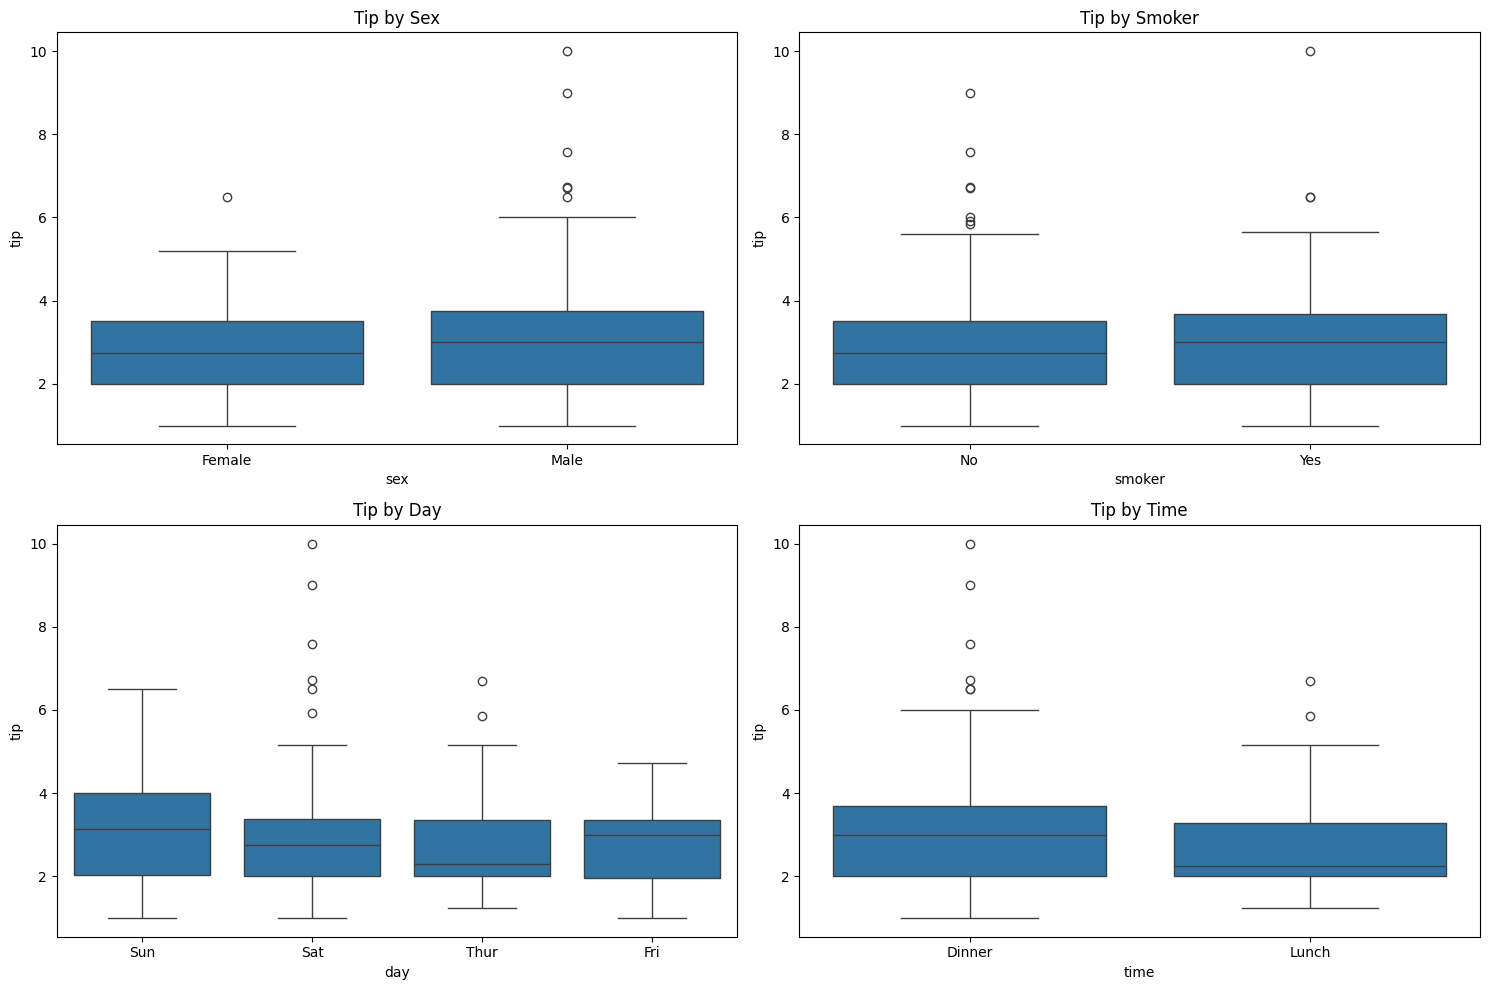

In [ ]:
display(df.describe())

categorical_cols = ['sex', 'smoker', 'day', 'time']
for col in categorical_cols:
    display(df[col].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x='sex', y='tip', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Tip by Sex')
sns.boxplot(x='smoker', y='tip', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Tip by Smoker')
sns.boxplot(x='day', y='tip', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Tip by Day')
sns.boxplot(x='time', y='tip', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Tip by Time')
plt.tight_layout()
plt.show()

## Veri temizleme (gerekirse)

### Subtask:
Eksik değerleri ele alın (doldurma veya silme). Anormal değerleri (outliers) tespit edip bunların etkisini değerlendirin.


**Reasoning**:
Verify if there are any missing values in the DataFrame and visualize potential outliers in the numerical columns using box plots.



,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


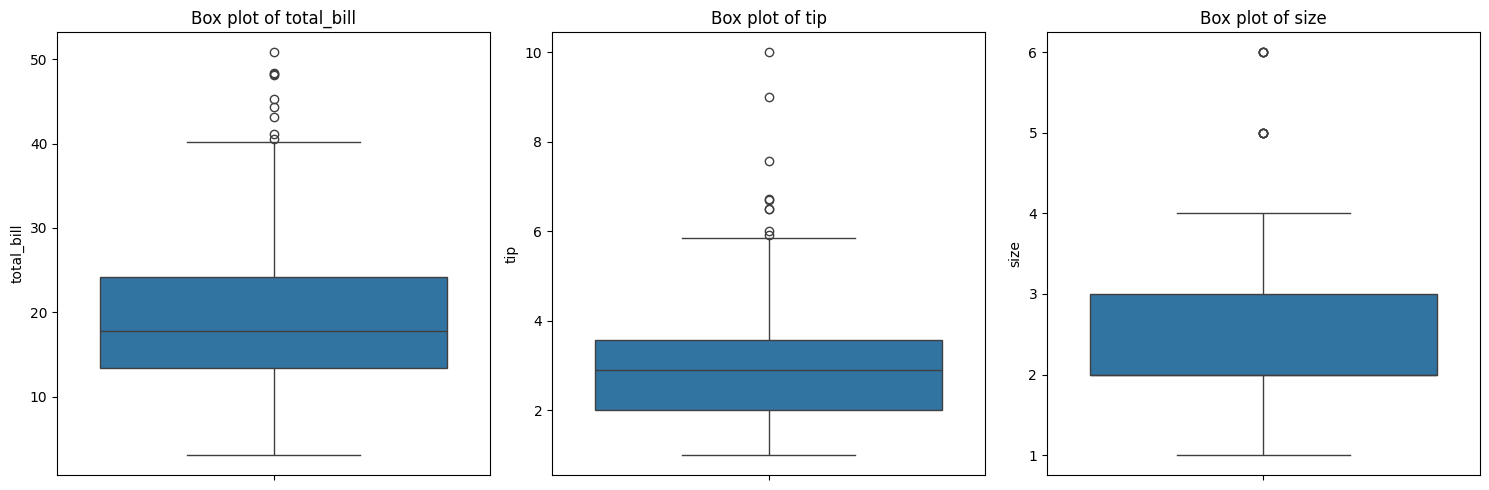

In [ ]:
display(df.isnull().sum())

numerical_cols = ['total_bill', 'tip', 'size']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

## Sonuçları yorumlama

### Subtask:
Analiz sonuçlarını özetleyin ve veri setinden elde edilen önemli bulguları açıklayın.


## Görselleştirme

### Subtask:
Elde ettiğiniz bulguları desteklemek için uygun grafikler (histogram, kutu grafiği, saçılım grafiği vb.) oluşturun.


**Reasoning**:
Create visualizations to support the findings from the EDA, including a histogram for tip distribution, a scatter plot for total bill vs. tip, box plots for categorical variables vs. tip, and a plot for size vs. tip.



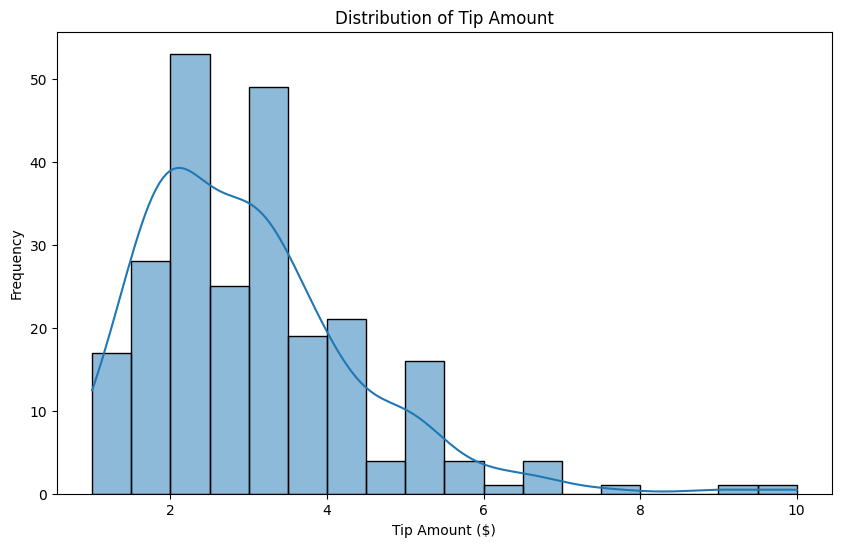

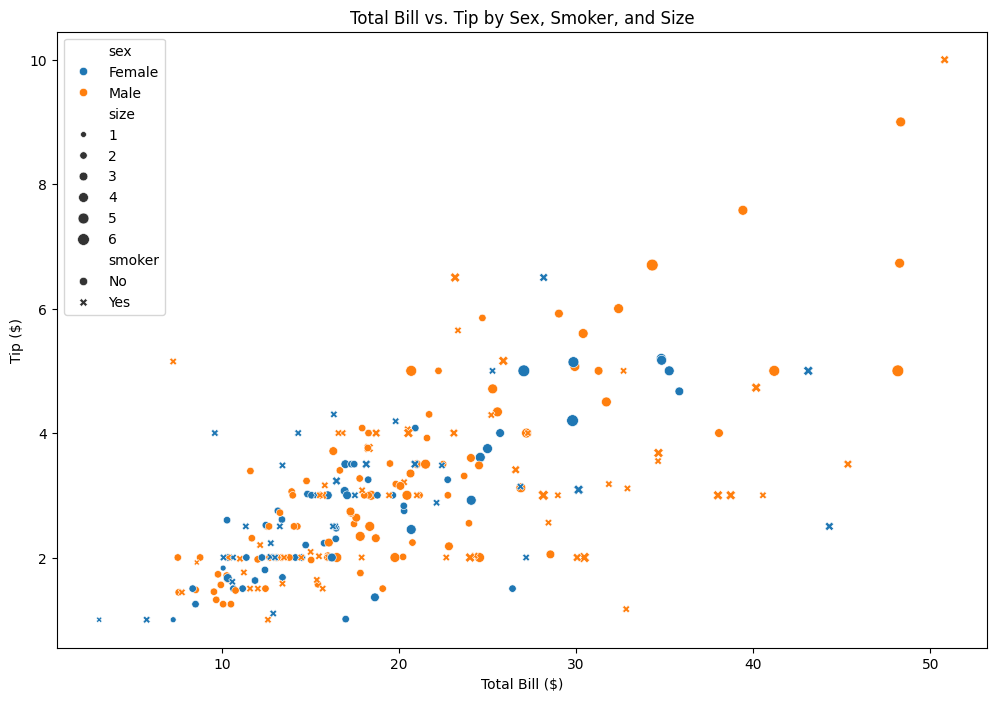

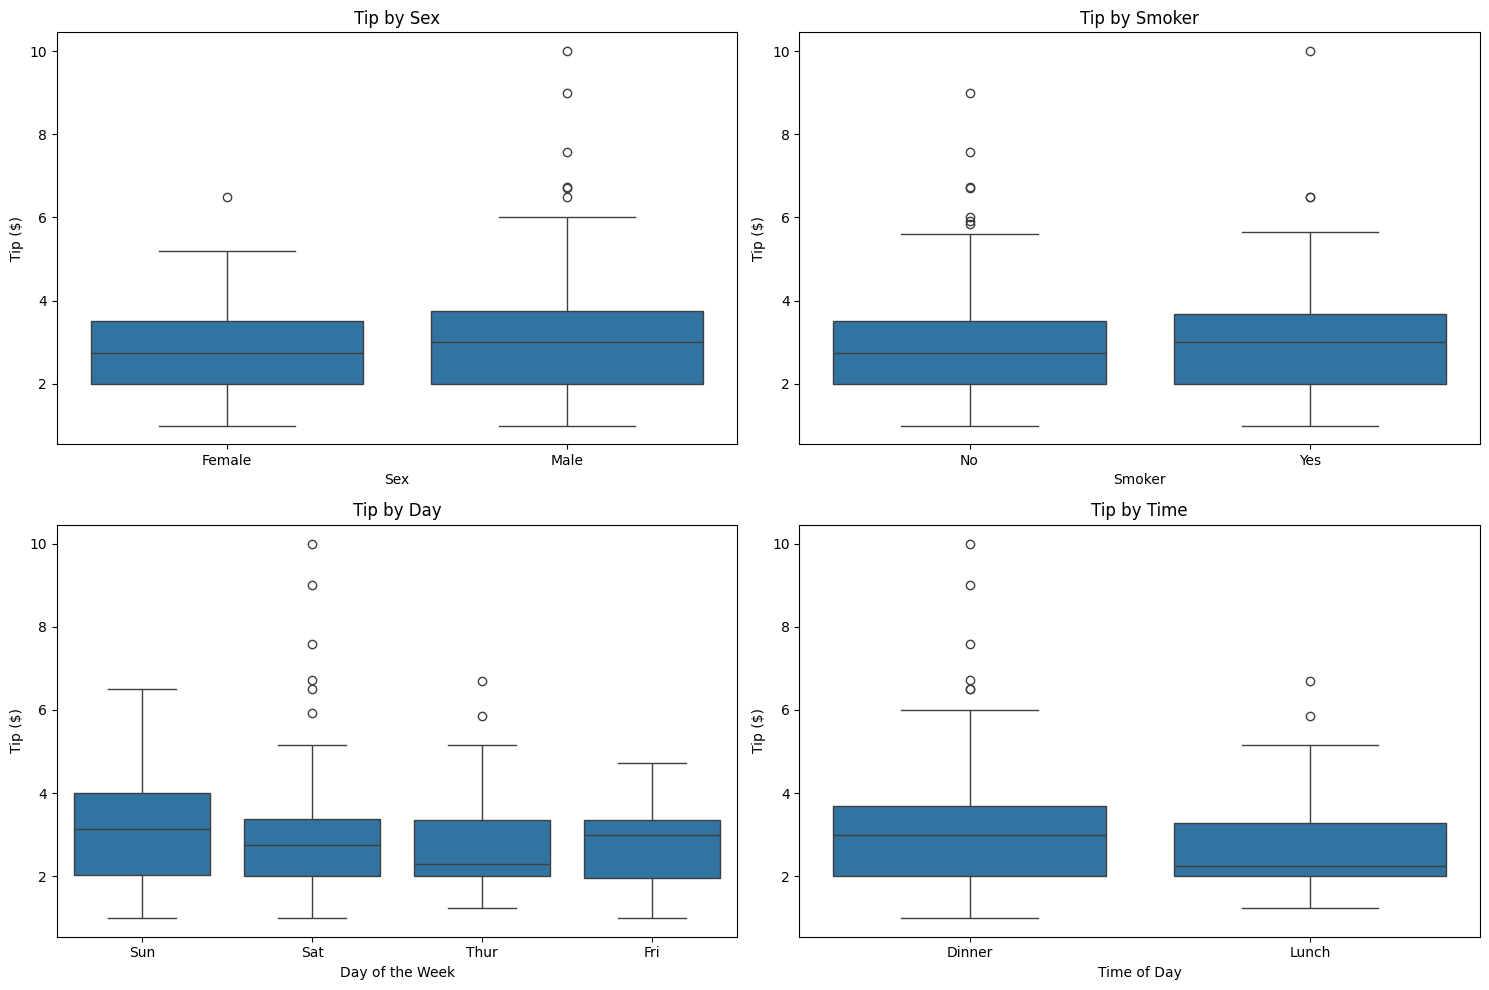

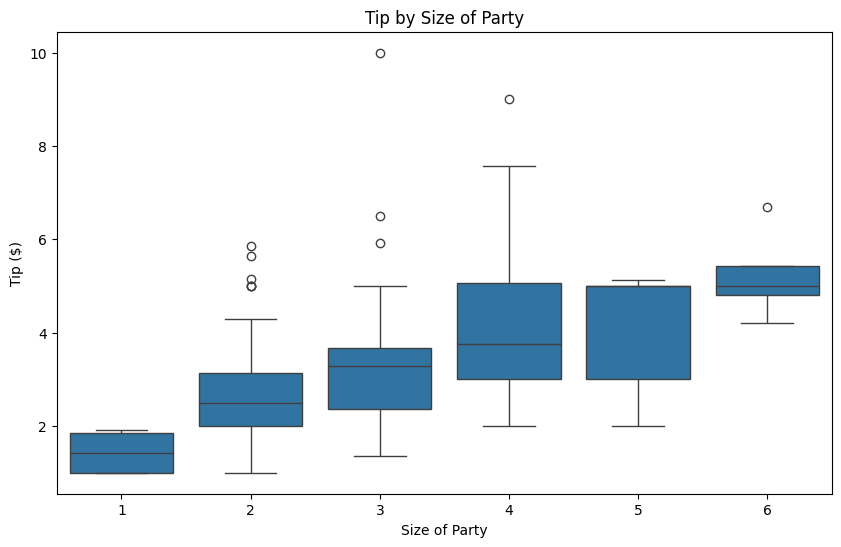

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of tip amount
plt.figure(figsize=(10, 6))
sns.histplot(df['tip'], kde=True)
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plot of total bill vs. tip with categorical variables
plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_bill', y='tip', hue='sex', style='smoker', size='size', data=df)
plt.title('Total Bill vs. Tip by Sex, Smoker, and Size')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.show()

# 3. Box plots for categorical variables vs. tip
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x='sex', y='tip', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Tip by Sex')
axes[0, 0].set_xlabel('Sex')
axes[0, 0].set_ylabel('Tip ($)')

sns.boxplot(x='smoker', y='tip', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Tip by Smoker')
axes[0, 1].set_xlabel('Smoker')
axes[0, 1].set_ylabel('Tip ($)')

sns.boxplot(x='day', y='tip', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Tip by Day')
axes[1, 0].set_xlabel('Day of the Week')
axes[1, 0].set_ylabel('Tip ($)')

sns.boxplot(x='time', y='tip', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Tip by Time')
axes[1, 1].set_xlabel('Time of Day')
axes[1, 1].set_ylabel('Tip ($)')

plt.tight_layout()
plt.show()

# 4. Plot for size vs. tip (using box plot as it shows distribution better for discrete size)
plt.figure(figsize=(10, 6))
sns.boxplot(x='size', y='tip', data=df)
plt.title('Tip by Size of Party')
plt.xlabel('Size of Party')
plt.ylabel('Tip ($)')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 244 entries and 7 columns, with no missing values.
*   A positive correlation exists between the total bill amount and the tip amount.
*   Tip amounts tend to be higher on weekends (Saturday and Sunday) and during dinner time compared to weekdays and lunch time, respectively.
*   The distribution of tip amounts is skewed towards lower values, with a peak around \$2-\$3.
*   Potential outliers were identified in the `total_bill`, `tip`, and `size` columns.
*   There is no immediately obvious strong difference in tipping behavior based on sex or smoker status, although males might tip slightly higher on average.
*   Larger party sizes generally result in higher tip amounts.

### Insights or Next Steps

*   Investigate the potential impact of the identified outliers on statistical analyses and consider appropriate handling methods if necessary.
*   Perform statistical tests to confirm the significance of the observed differences in tipping behavior across categorical variables like day and time.


## Analizlerden Elde Edilen Temel Bulgular ve İş Çıkarımlarının Detaylandırılması

### Temel Bulguların Detaylandırılması

*   **Toplam Hesap ve Bahşiş İlişkisi:** Saçılım grafiği, toplam hesap ile bahşiş arasında belirgin bir pozitif korelasyon olduğunu açıkça göstermektedir. Bu, daha yüksek hesapların genellikle daha yüksek mutlak bahşiş miktarlarıyla sonuçlandığı anlamına gelir. Ancak, bahşişin toplam hesaba oranının (bahşiş yüzdesi) hesap tutarı arttıkça nasıl değiştiği ek bir analiz konusu olabilir. İşletme açısından bu, ortalama hesap tutarını artırmaya yönelik stratejilerin (örneğin, tatlı veya içecek satışını teşvik etme) genel bahşiş gelirini artırma potansiyeli taşıdığını göstermektedir.
*   **Gün ve Saat Etkisi:** Kutu grafikleri, Pazar ve Cumartesi günlerinin bahşiş ortalaması ve dağılımı açısından diğer günlere göre daha yüksek olduğunu göstermektedir. Benzer şekilde, akşam yemeği (Dinner) saatleri öğle yemeği (Lunch) saatlerine göre daha yüksek bahşişlerle ilişkilidir. Bu bulgu, restoranın en yoğun ve karlı zamanlarının hafta sonu akşamları olduğunu doğrulamaktadır. İşletme, bu zaman dilimlerinde daha fazla personel istihdam ederek, hizmet kalitesini en üst düzeye çıkararak ve özel menüler veya promosyonlar sunarak bu potansiyeli maksimize edebilir.
*   **Bahşiş Dağılımı:** Bahşiş miktarının histogramı, dağılımın sağa çarpık olduğunu, yani çoğu bahşişin düşük ve orta düzeyde olduğunu göstermektedir. Ortalama bahşiş miktarı yaklaşık 3 dolar civarındadır, ancak medyan değer muhtemelen biraz daha düşüktür (histogramın zirvesi medyanın yakınında olabilir). Bu, "ortalama" bir bahşişin ne kadar olduğunu anlamak için önemlidir. İşletme, bahşiş miktarını artırmak için ortalama bahşişin üzerinde bahşiş bırakmayı teşvik edecek yöntemler düşünebilir (örneğin, mükemmel hizmet için özel teşekkürler veya bahşiş kutuları).
*   **Kişi Sayısı Etkisi:** Kişi sayısı arttıkça bahşiş miktarının da arttığı kutu grafiğinden görülmektedir. Özellikle 3 veya daha fazla kişilik gruplar daha yüksek bahşiş ortalamalarına sahiptir. Bu, büyük gruplara sunulan hizmetin kalitesinin doğrudan bahşiş gelirini etkileyebileceğini göstermektedir. Restoranlar, büyük gruplar için rezervasyon sistemlerini optimize edebilir, özel masa düzenlemeleri sunabilir ve büyük gruplara hizmet konusunda deneyimli personel görevlendirebilir.
*   **Cinsiyet ve Sigara Durumu:** Cinsiyet ve sigara içip içmeme durumuna göre bahşiş dağılımlarına bakıldığında, belirgin ve büyük bir fark görülmemektedir. Kutu grafikleri, medyan bahşiş miktarlarının ve dağılımlarının her iki kategori için de benzer olduğunu göstermektedir. Bu, bu faktörlerin bahşiş verme davranışı üzerinde birincil etkenler olmadığını düşündürmektedir. Bu nedenle, pazarlama veya hizmet stratejilerini doğrudan bu demografik özelliklere göre şekillendirmek etkili olmayabilir.
*   **Aykırı Değerler:** Kutu grafikleri, toplam hesap, bahşiş ve kişi sayısı sütunlarında bazı aykırı değerlerin varlığını göstermektedir. Örneğin, çok yüksek toplam hesaplar veya çok yüksek bahşişler bulunmaktadır. Bu aykırı değerler, veri setindeki nadir ancak önemli olayları (örneğin, çok pahalı bir akşam yemeği yiyen veya olağanüstü cömert olan bir müşteri) temsil edebilir. Bu değerlerin analize dahil edilip edilmeyeceği veya nasıl ele alınacağı, analizin amacına bağlıdır. Örneğin, ortalama bahşişi hesaplarken aykırı değerler ortalamayı yukarı çekebilir, bu nedenle medyan gibi daha sağlam istatistiklere bakmak faydalı olabilir.

### İş Çıkarımlarının Detaylandırılması

*   **Gelir Optimizasyonu:** Hafta sonu akşamları ve büyük gruplara odaklanmanın yanı sıra, menüyü analiz ederek hangi öğelerin toplam hesabı önemli ölçüde artırdığını belirlemek faydalı olabilir. Bu öğelerin satışını teşvik etmek (garsonlar aracılığıyla veya menü tasarımında vurgulayarak) genel geliri ve dolayısıyla bahşiş potansiyelini artırabilir. Ayrıca, "happy hour" gibi öğle yemeği saatlerini daha çekici hale getirecek kampanyalar düzenlenerek bu zaman dilimindeki bahşiş geliri artırılabilir.
*   **Personel Yönetimi:** Yoğun saatlerde yeterli personel bulundurmanın yanı sıra, personelin bahşiş potansiyelini nasıl artırabileceği konusunda eğitim verilmesi önemlidir. Mükemmel müşteri hizmeti, samimi etkileşimler ve menü bilgisi, müşterilerin daha fazla bahşiş bırakmasını teşvik edebilir. Bahşişlerin personel arasında nasıl dağıtıldığı da motivasyon açısından önemli bir faktör olabilir.
*   **Müşteri Segmentasyonu:** Cinsiyet ve sigara durumu gibi faktörler belirleyici olmasa da, müşteri davranışlarına dayalı segmentasyon yapılabilir. Örneğin, sık gelen müşterilere yönelik sadakat programları veya belirli bir harcama tutarının üzerindeki müşterilere yönelik ayrıcalıklar bahşiş verme eğilimini etkileyebilir. Büyük gruplara yönelik özel "aile boyu" menüler veya set menüler sunmak da cazip olabilir.
*   **Veri İzleme:** Aykırı değerlerin tespiti, veri kalitesini artırmak için önemlidir. Çok yüksek veya düşük değerlerin nedenlerini araştırmak (örneğin, yanlış veri girişi mi, yoksa gerçekten istisnai bir durum mu?) veri setinin doğruluğunu sağlamaya yardımcı olur. Ayrıca, zaman içindeki bahşiş eğilimlerini izlemek (örneğin, aylık veya mevsimlik değişimler) işletmenin performansını değerlendirmek için önemlidir.
*   **Hizmet Kalitesi:** Analiz, genel hizmet kalitesinin bahşişler üzerindeki en önemli etkene işaret ettiğini göstermektedir. Personelin güler yüzlü, bilgili ve verimli olması, siparişlerin doğru ve zamanında alınması ve müşteri şikayetlerinin etkin bir şekilde çözülmesi, müşteri memnuniyetini ve dolayısıyla bahşiş miktarını doğrudan etkileyecektir. Müşteri geri bildirimlerini toplamak ve analiz etmek, hizmet kalitesini sürekli iyileştirmek için önemlidir.

Bu detaylandırmalar, veri analizinden elde edilen bulguların iş stratejilerine nasıl entegre edilebileceği konusunda daha derinlemesine bir anlayış sağlamaktadır.

https://gemini.google.com/share/bca7d73f038f